In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

In [ ]:
pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gdelt = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/dataset4_cleaned.csv')

In [ ]:
gdelt

,GlobalEventID,EventCode,GoldsteinScale,AvgTone,ActionGeo_CountryCode,SOURCEURL
0,1066782683,202,-10.0,-3.575685,US,https://www.cherokeephoenix.org/news/haaland-u...
1,1066786978,144,-7.5,-3.306878,US,https://www.eastidahonews.com/2022/10/viking-c...
2,1066745926,202,-10.0,-3.111740,US,https://www.starnewsonline.com/story/news/hist...
3,1066717370,144,-7.5,-8.015267,PK,https://www.dawn.com/news/1714156/terrorism-ca...
4,1065677782,144,-7.5,-3.937008,US,https://www.koaa.com/news/covering-colorado/wr...
...,...,...,...,...,...,...
78633,1132445374,195,-10.0,-6.914894,US,https://www.oleantimesherald.com/news/groups-c...
78634,1133164721,195,-10.0,-5.818182,US,http://theforumnewsgroup.com/2023/10/13/cyberc...
78635,1134975911,195,-10.0,-4.000000,US,https://www.10news.com/us-rep-justin-amash-con...
78636,1134985125,195,-10.0,-4.000000,US,https://www.kxxv.com/us-rep-justin-amash-confi...


In [ ]:
imf1 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetIMF_US.csv')
imf2 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetIMF_PK.csv')

In [ ]:

gdelt1 = gdelt[gdelt["ActionGeo_CountryCode"] == "US"]["AvgTone"]
gdelt2 = gdelt[gdelt["ActionGeo_CountryCode"] == "PK"]["AvgTone"]

In [ ]:
gdelt2.head(10)

,AvgTone
3,-8.015267
12,-5.111294
14,-5.473204
15,-10.344828
16,-5.694444
41,-11.884058
42,-7.500000
43,-7.142857
52,-14.064985
54,-13.043478


In [ ]:
imfUS = imf1.drop(columns=['Country code'])
imfPK = imf2.drop(columns=['Country code'])

In [ ]:
gdelt1 = gdelt1.dropna()
imfUS = imfUS.dropna()
gdelt2 = gdelt2.dropna()
imfPK = imfPK.dropna()

In [ ]:
gdelt1.reset_index(drop=True, inplace=True)
gdelt2.reset_index(drop=True, inplace=True)

In [ ]:
df_transposed = imfUS.T
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:].reset_index(drop=True)

In [ ]:
df_transposed1 = imfPK.T
df_transposed1.columns = df_transposed1.iloc[0]
df_transposed1 = df_transposed1[1:].reset_index(drop=True)

In [ ]:
important_columns = [
    'Current account', 'Goods and services', 'Total credit', 'Total debit',
    'Net international investment position', 'Direct investment', 'Portfolio investment',
    'Reserve assets', 'Net errors and omissions',
    'Investment income, credit', 'Investment income, debit', 'Financial account',
    'Capital account', 'Secondary income'
]


df_transposed = df_transposed[important_columns]
df_transposed = df_transposed.loc[:, ~df_transposed.columns.duplicated()]

important_columns1 = [
    'Current account', 'Goods and services', 'Total credit', 'Total debit',
    'Net international investment position', 'Direct investment', 'Portfolio investment',
    'Reserve assets', 'Net errors and omissions',
    'Investment income, credit', 'Investment income, debit', 'Financial account',
    'Capital account', 'Secondary income'
]
df_transposed1 = df_transposed1[important_columns1]
df_transposed1 = df_transposed1.loc[:, ~df_transposed1.columns.duplicated()]


df_transposed1.head(10)

Indicator,Current account,Goods and services,Total credit,Total debit,Net international investment position,Direct investment,Portfolio investment,Reserve assets,Net errors and omissions,"Investment income, credit","Investment income, debit",Financial account,Capital account,Secondary income
0,"-12.216,11","-37.627,11","678,00","6.092,00","-128.075,19","-305,00","714,00","-11.961,31","194,01","359,00","6.064,00","-11.616,09","406,00","30.825,00"
1,"-3.902,08","-10.238,08","145,00","1.436,00","-128.662,82","-91,00","-555,00","-5.715,02","25,03","76,00","1.430,00","-3.827,05","50,00","7.627,00"
2,"-4.466,85","-11.583,85","187,00","1.638,00","-131.126,71","-496,00","236,00","-1.481,60","366,29","78,00","1.630,00","-4.061,57","39,00","8.568,00"
3,"-2.441,03","-9.431,03","245,00","1.266,00","-130.504,39","-353,00","30,00","-2.214,91","-0,73","174,00","1.259,00","-2.407,76","34,00","8.011,00"
4,"-1.406,15","-6.374,15","101,00","1.752,00","-128.075,19","635,00","1.003,00","-2.549,77","-196,57","31,00","1.745,00","-1.319,72","283,00","6.619,00"


In [ ]:
df_transposed1.head(10)

Indicator,Current account,Goods and services,Total credit,Total debit,Net international investment position,Direct investment,Portfolio investment,Reserve assets,Net errors and omissions,"Investment income, credit","Investment income, debit",Financial account,Capital account,Secondary income
0,"-12.216,11","-37.627,11","678,00","6.092,00","-128.075,19","-305,00","714,00","-11.961,31","194,01","359,00","6.064,00","-11.616,09","406,00","30.825,00"
1,"-3.902,08","-10.238,08","145,00","1.436,00","-128.662,82","-91,00","-555,00","-5.715,02","25,03","76,00","1.430,00","-3.827,05","50,00","7.627,00"
2,"-4.466,85","-11.583,85","187,00","1.638,00","-131.126,71","-496,00","236,00","-1.481,60","366,29","78,00","1.630,00","-4.061,57","39,00","8.568,00"
3,"-2.441,03","-9.431,03","245,00","1.266,00","-130.504,39","-353,00","30,00","-2.214,91","-0,73","174,00","1.259,00","-2.407,76","34,00","8.011,00"
4,"-1.406,15","-6.374,15","101,00","1.752,00","-128.075,19","635,00","1.003,00","-2.549,77","-196,57","31,00","1.745,00","-1.319,72","283,00","6.619,00"


In [ ]:
df_merged1 = pd.merge(gdelt1, df_transposed, left_index=True, right_index=True, how='inner')

In [ ]:
df_merged2 = pd.merge(gdelt2, df_transposed1, left_index=True, right_index=True, how='inner')

In [ ]:
df_merged2.head()

,AvgTone,Current account,Goods and services,Total credit,Total debit,Net international investment position,Direct investment,Portfolio investment,Reserve assets,Net errors and omissions,"Investment income, credit","Investment income, debit",Financial account,Capital account,Secondary income
0,-8.015267,"-12.216,11","-37.627,11","678,00","6.092,00","-128.075,19","-305,00","714,00","-11.961,31","194,01","359,00","6.064,00","-11.616,09","406,00","30.825,00"
1,-5.111294,"-3.902,08","-10.238,08","145,00","1.436,00","-128.662,82","-91,00","-555,00","-5.715,02","25,03","76,00","1.430,00","-3.827,05","50,00","7.627,00"
2,-5.473204,"-4.466,85","-11.583,85","187,00","1.638,00","-131.126,71","-496,00","236,00","-1.481,60","366,29","78,00","1.630,00","-4.061,57","39,00","8.568,00"
3,-10.344828,"-2.441,03","-9.431,03","245,00","1.266,00","-130.504,39","-353,00","30,00","-2.214,91","-0,73","174,00","1.259,00","-2.407,76","34,00","8.011,00"
4,-5.694444,"-1.406,15","-6.374,15","101,00","1.752,00","-128.075,19","635,00","1.003,00","-2.549,77","-196,57","31,00","1.745,00","-1.319,72","283,00","6.619,00"


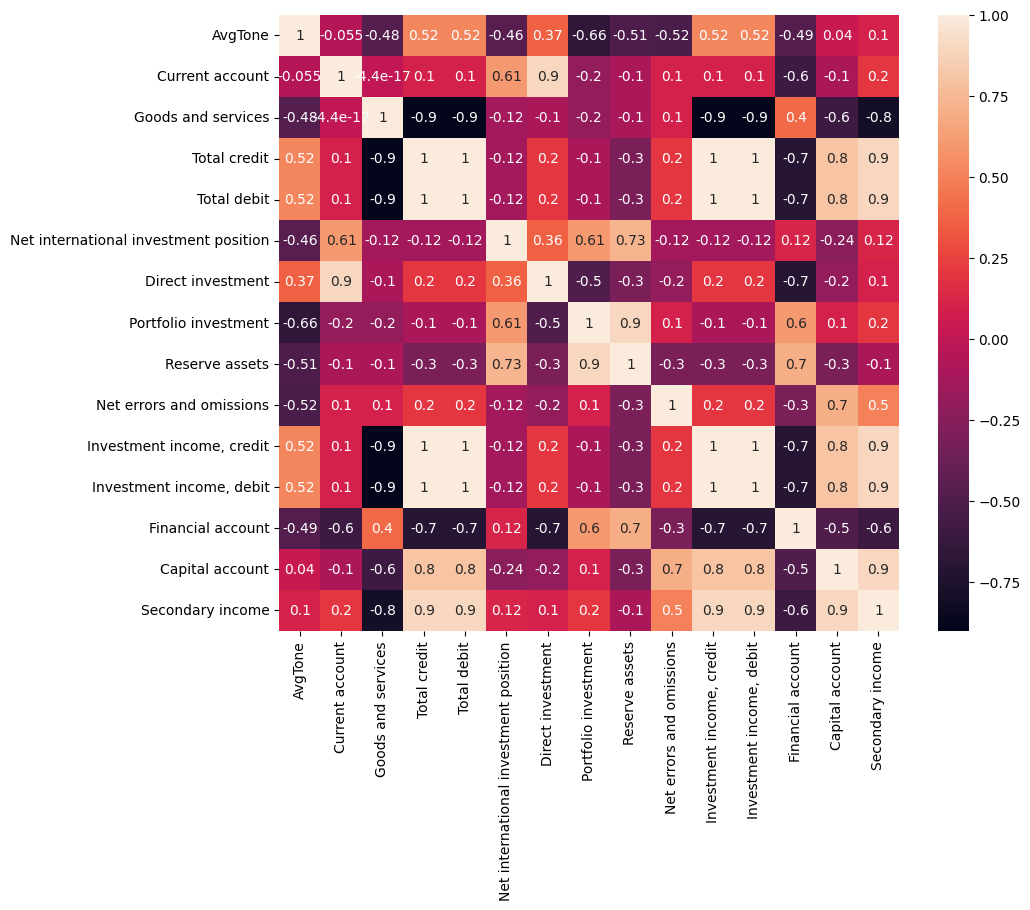

<Figure size 640x480 with 0 Axes>

In [ ]:
le = LabelEncoder()

for column in df_merged1.columns:
    if df_merged1[column].dtype == 'object':
        df_merged1[column] = le.fit_transform(df_merged1[column].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df_merged1.corr(), annot=True)
plt.show()

plt.tight_layout()
plt.show()

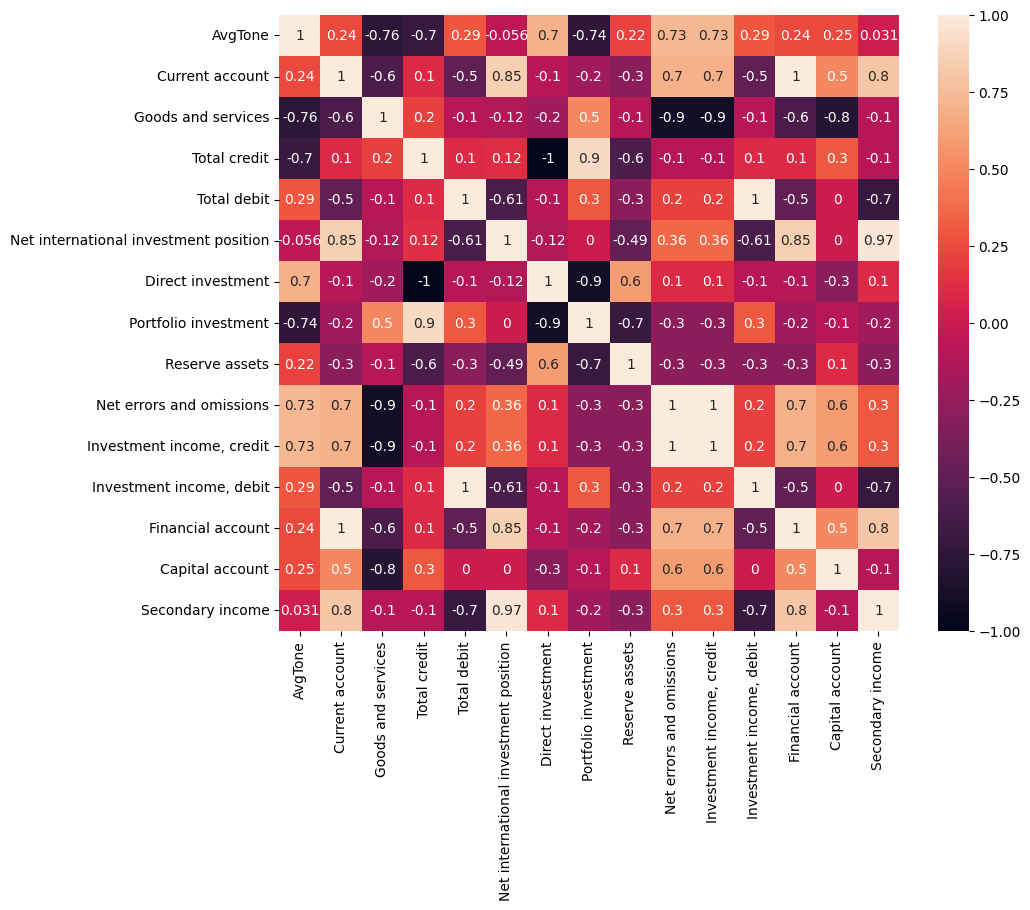

<Figure size 640x480 with 0 Axes>

In [ ]:
le = LabelEncoder()

for column in df_merged2.columns:
    if df_merged2[column].dtype == 'object':
        df_merged2[column] = le.fit_transform(df_merged2[column].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df_merged2.corr(), annot=True)
plt.show()

plt.tight_layout()
plt.show()

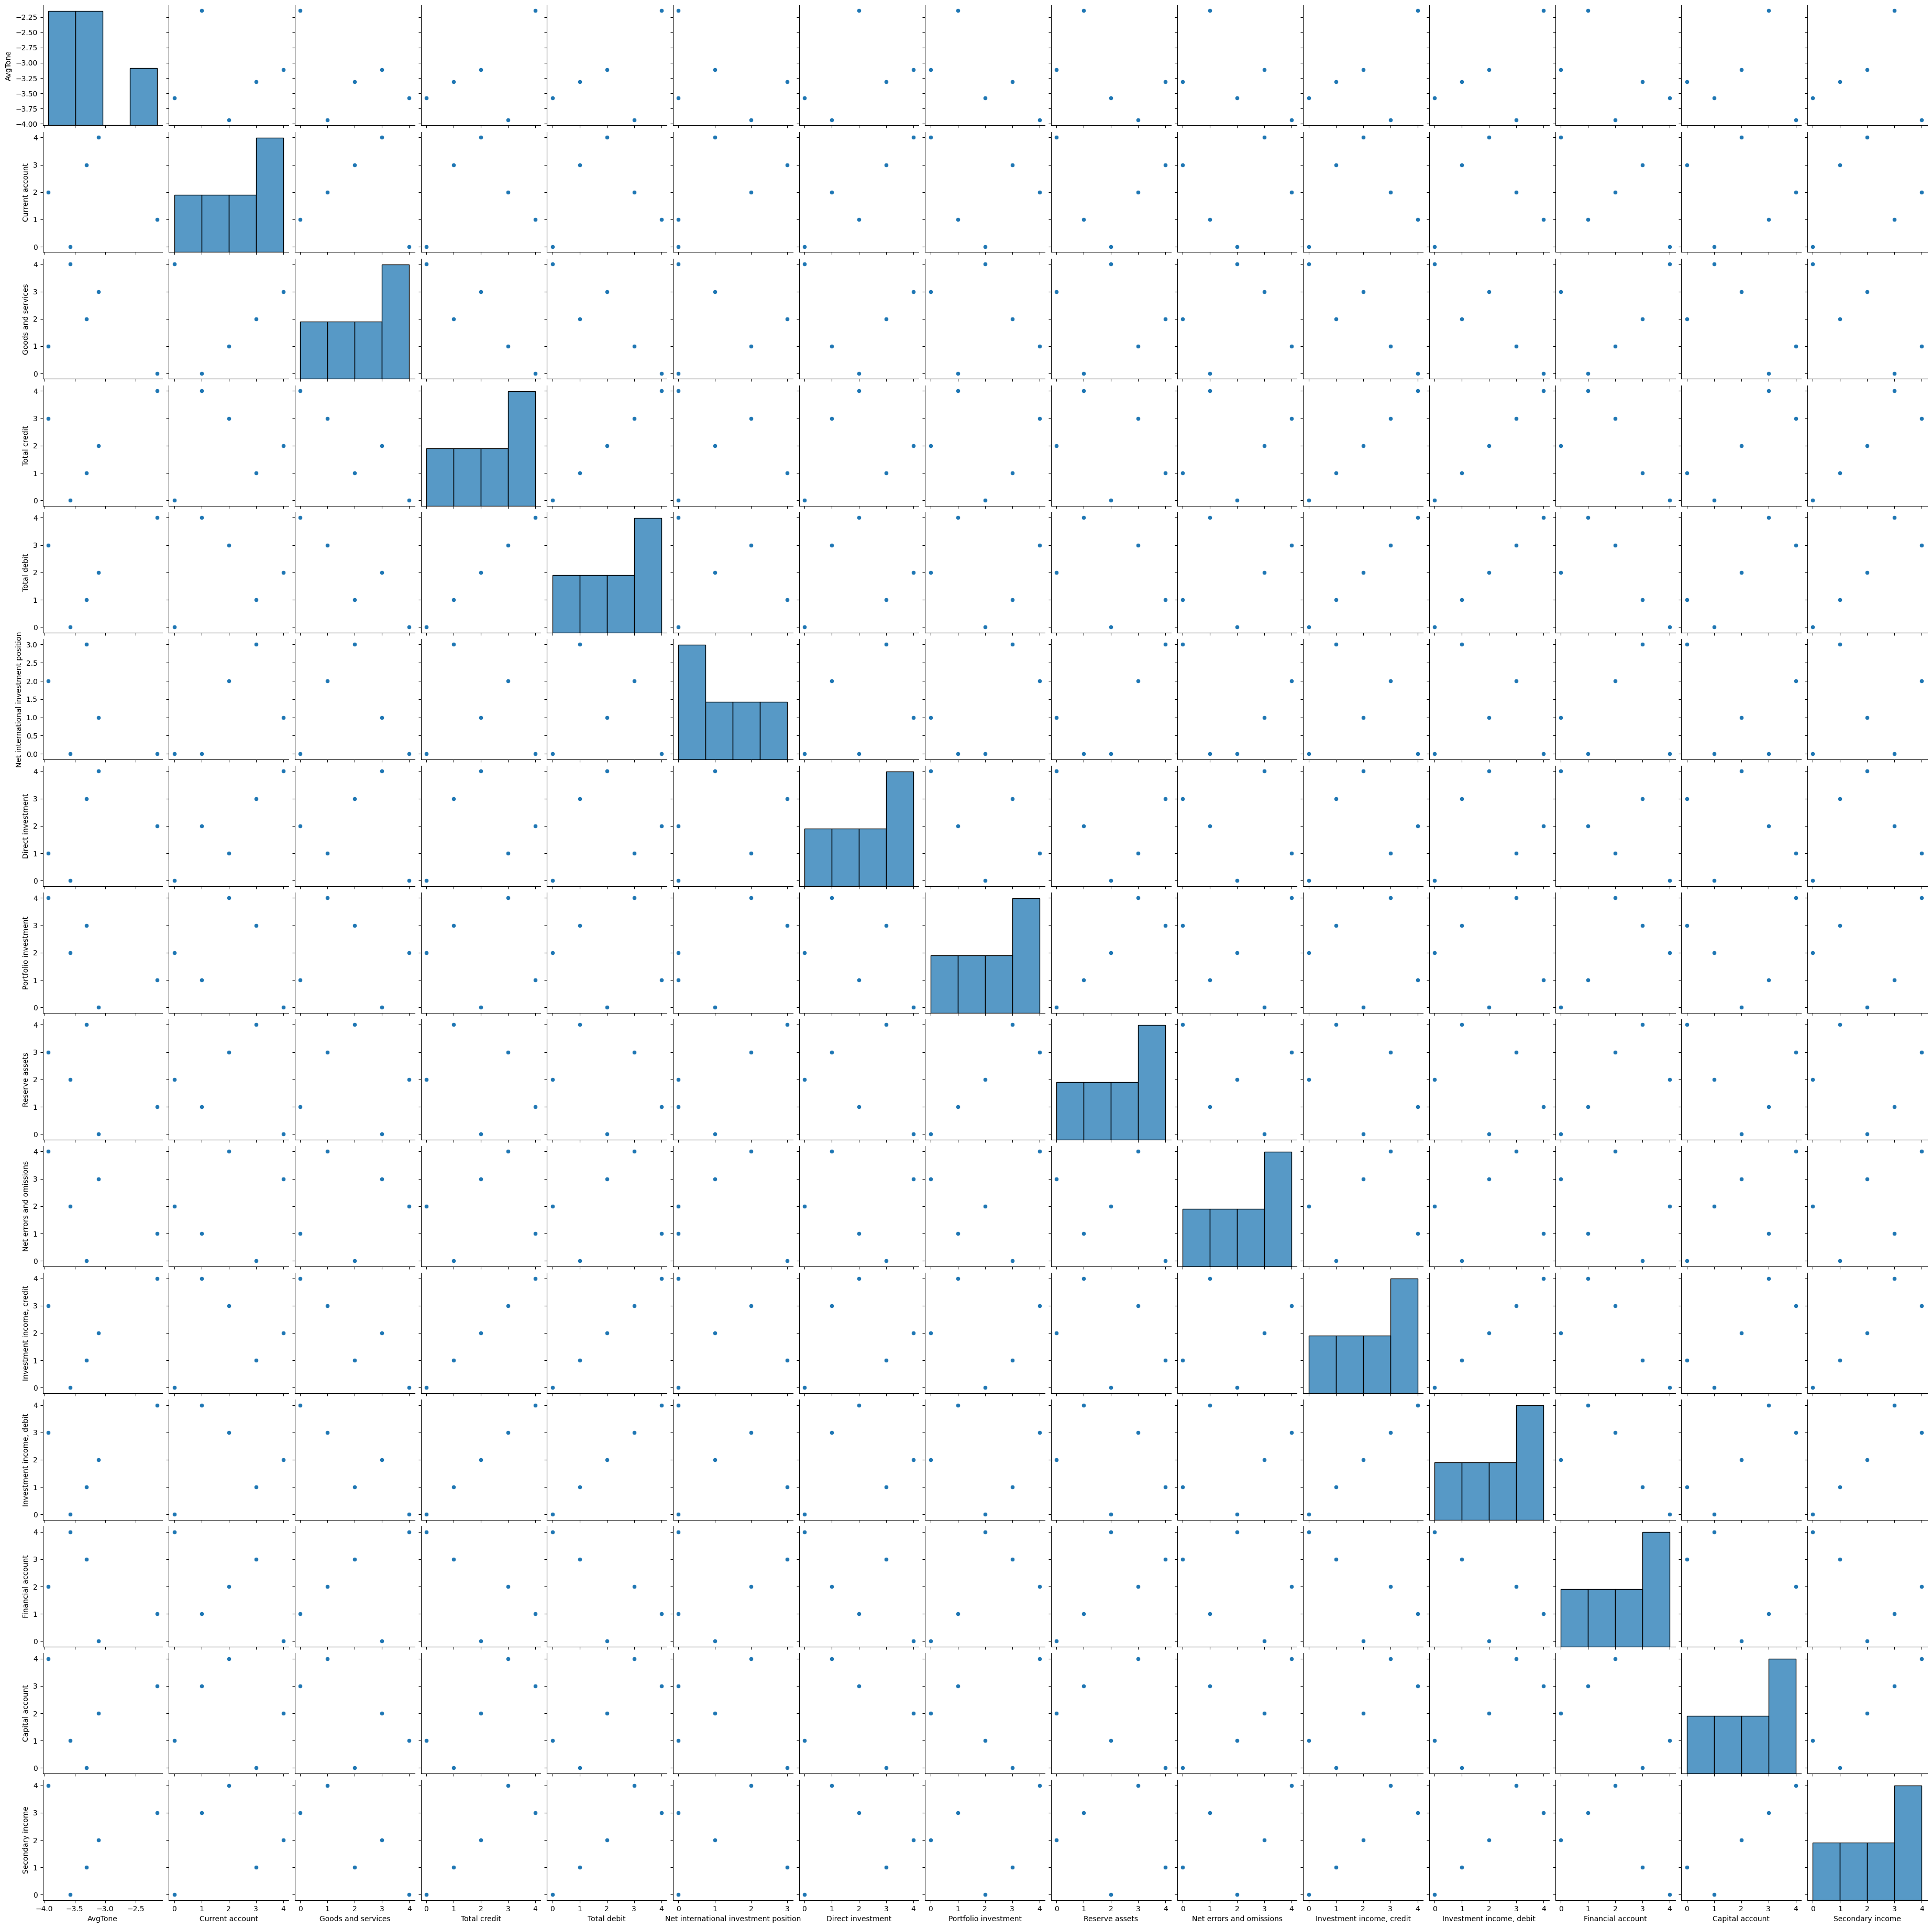

In [ ]:
sns.pairplot(df_merged1)
plt.show()

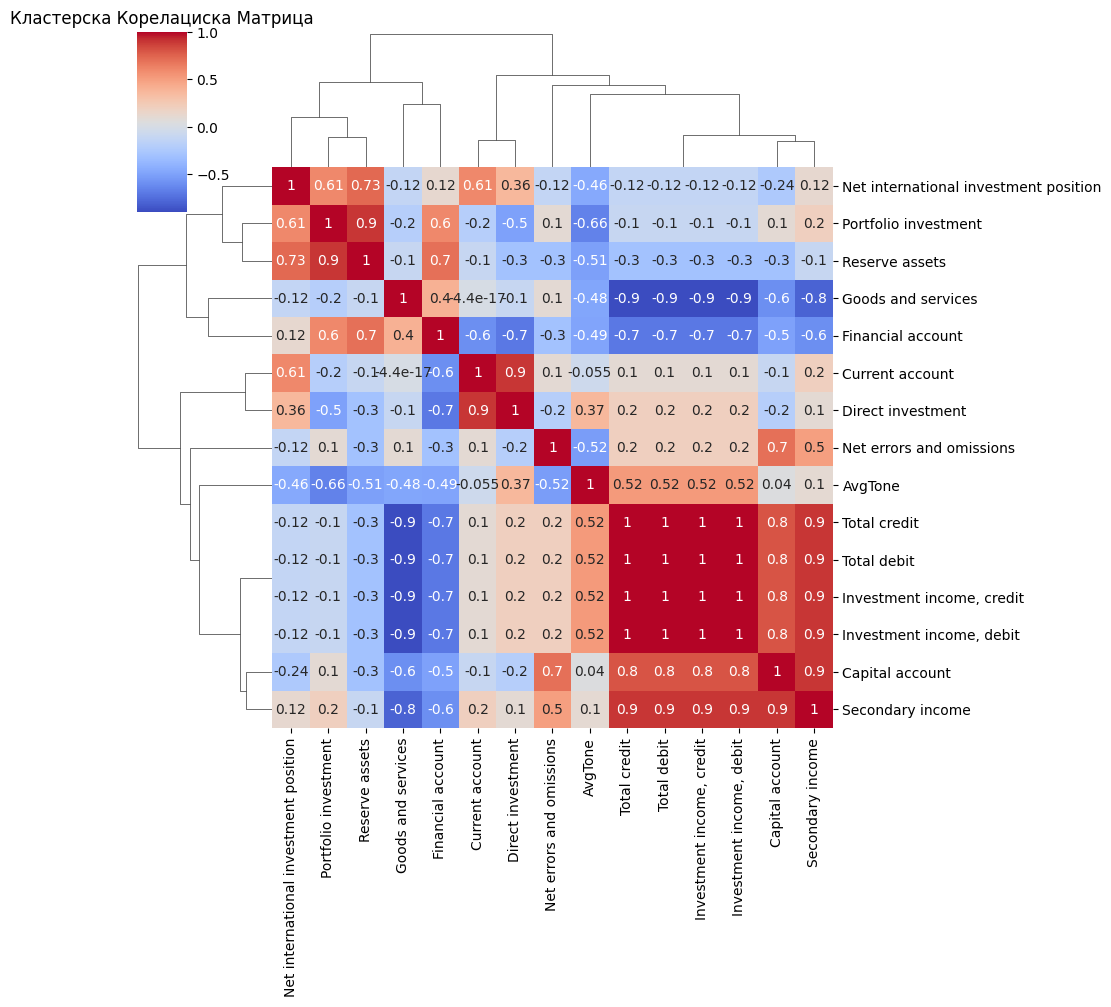

In [ ]:
sns.clustermap(df_merged1.corr(), annot=True, cmap='coolwarm')
plt.title('Кластерска Корелациска Матрица')
plt.show()

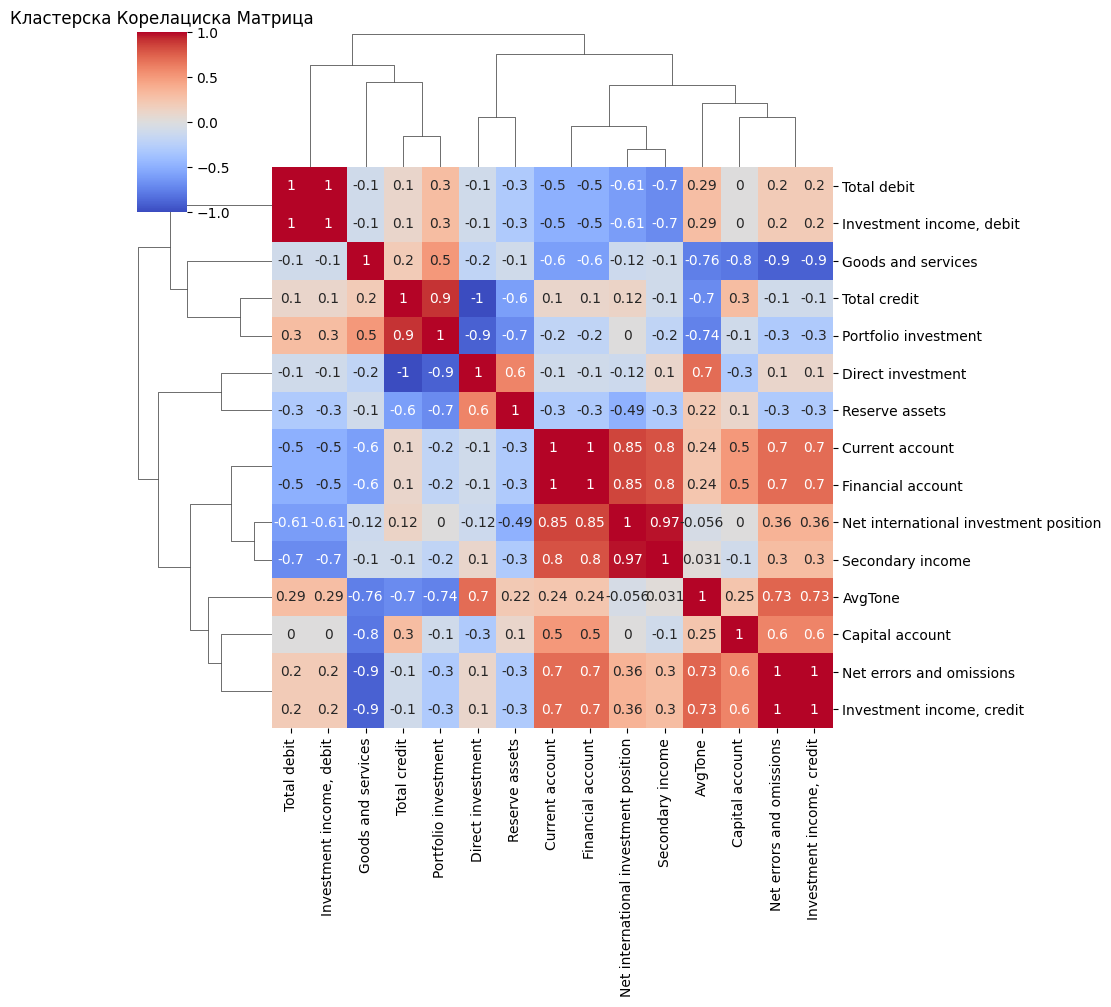

In [ ]:
sns.clustermap(df_merged2.corr(), annot=True, cmap='coolwarm')
plt.title('Кластерска Корелациска Матрица')
plt.show()

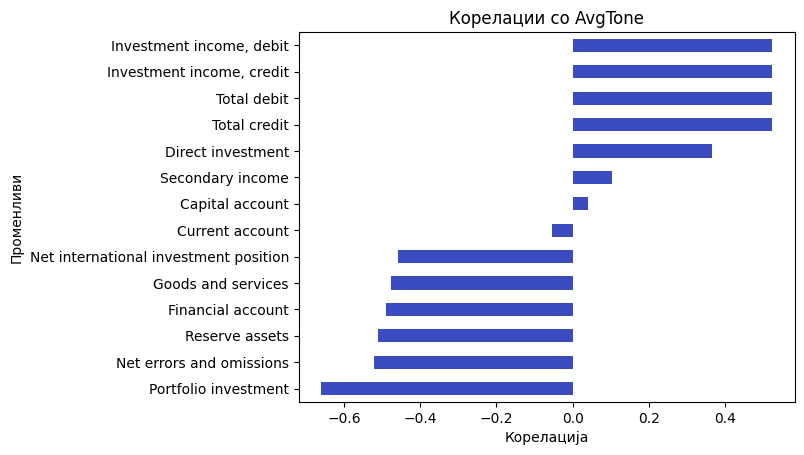

In [ ]:
corrs = df_merged1.corr()['AvgTone'].drop('AvgTone')
corrs.sort_values().plot(kind='barh', colormap='coolwarm')
plt.xlabel('Корелација')
plt.ylabel('Променливи')
plt.title('Корелации со AvgTone')
plt.show()

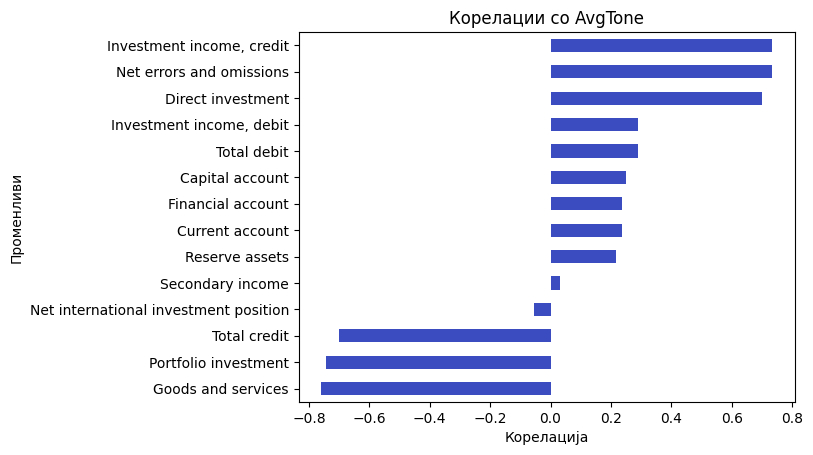

In [ ]:
corrs = df_merged2.corr()['AvgTone'].drop('AvgTone')
corrs.sort_values().plot(kind='barh', colormap='coolwarm')
plt.xlabel('Корелација')
plt.ylabel('Променливи')
plt.title('Корелации со AvgTone')
plt.show()

In [ ]:
spearman_corr = df_merged1.corr(method='spearman')
print("Spearman Correlation:\n", spearman_corr)

kendall_corr = df_merged1.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr)

Spearman Correlation:
                                         AvgTone  Current account  \
AvgTone                                1.000000         0.200000   
Current account                        0.200000         1.000000   
Goods and services                    -0.300000         0.000000   
Total credit                           0.400000         0.100000   
Total debit                            0.400000         0.100000   
Net international investment position -0.359092         0.666886   
Direct investment                      0.600000         0.900000   
Portfolio investment                  -0.800000        -0.200000   
Reserve assets                        -0.600000        -0.100000   
Net errors and omissions              -0.500000         0.100000   
Investment income, credit              0.400000         0.100000   
Investment income, debit               0.400000         0.100000   
Financial account                     -0.600000        -0.600000   
Capital account          

In [ ]:
spearman_corr = df_merged2.corr(method='spearman')
print("Spearman Correlation:\n", spearman_corr)

kendall_corr = df_merged2.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr)

Spearman Correlation:
                                         AvgTone  Current account  \
AvgTone                                1.000000         0.500000   
Current account                        0.500000         1.000000   
Goods and services                    -0.900000        -0.600000   
Total credit                          -0.600000         0.100000   
Total debit                            0.000000        -0.500000   
Net international investment position  0.153897         0.872082   
Direct investment                      0.600000        -0.100000   
Portfolio investment                  -0.800000        -0.200000   
Reserve assets                         0.300000        -0.300000   
Net errors and omissions               0.800000         0.700000   
Investment income, credit              0.800000         0.700000   
Investment income, debit               0.000000        -0.500000   
Financial account                      0.500000         1.000000   
Capital account          

In [ ]:
from dcor import distance_correlation

numeric_columns = df_merged1.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('AvgTone', errors='ignore')

results = {}
for col in numeric_columns:
    corr_value = distance_correlation(df_merged1['AvgTone'], df_merged1[col])
    results[col] = corr_value

sorted_results = sorted(results.items(), key=lambda x: abs(x[1]), reverse=True)
for col, value in sorted_results:
    print(f"Distance Correlation between AvgTone and {col}: {value:.4f}")

Distance Correlation between AvgTone and Portfolio investment: 0.7739
Distance Correlation between AvgTone and Total credit: 0.7587
Distance Correlation between AvgTone and Total debit: 0.7587
Distance Correlation between AvgTone and Investment income, credit: 0.7587
Distance Correlation between AvgTone and Investment income, debit: 0.7587
Distance Correlation between AvgTone and Goods and services: 0.7332
Distance Correlation between AvgTone and Reserve assets: 0.7148
Distance Correlation between AvgTone and Financial account: 0.7106
Distance Correlation between AvgTone and Direct investment: 0.7065
Distance Correlation between AvgTone and Secondary income: 0.6801
Distance Correlation between AvgTone and Net errors and omissions: 0.6778
Distance Correlation between AvgTone and Capital account: 0.6671
Distance Correlation between AvgTone and Current account: 0.6150
Distance Correlation between AvgTone and Net international investment position: 0.6002


/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


In [ ]:
numeric_columns = df_merged2.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('AvgTone', errors='ignore')

results = {}
for col in numeric_columns:
    corr_value = distance_correlation(df_merged2['AvgTone'], df_merged2[col])
    results[col] = corr_value

sorted_results = sorted(results.items(), key=lambda x: abs(x[1]), reverse=True)
for col, value in sorted_results:
    print(f"Distance Correlation between AvgTone and {col}: {value:.4f}")


Distance Correlation between AvgTone and Portfolio investment: 0.8522
Distance Correlation between AvgTone and Direct investment: 0.8384
Distance Correlation between AvgTone and Total credit: 0.8384
Distance Correlation between AvgTone and Goods and services: 0.7672
Distance Correlation between AvgTone and Net errors and omissions: 0.7545
Distance Correlation between AvgTone and Investment income, credit: 0.7545
Distance Correlation between AvgTone and Total debit: 0.6743
Distance Correlation between AvgTone and Investment income, debit: 0.6743
Distance Correlation between AvgTone and Current account: 0.6011
Distance Correlation between AvgTone and Financial account: 0.6011
Distance Correlation between AvgTone and Reserve assets: 0.5875
Distance Correlation between AvgTone and Secondary income: 0.5347
Distance Correlation between AvgTone and Capital account: 0.5199
Distance Correlation between AvgTone and Net international investment position: 0.4758


/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = df_merged1['AvgTone'].values.reshape(-1, 1)

mi_dict = {}

for column in df_merged1.columns:
    if column != 'AvgTone':
        y = df_merged1[column]
        mi = mutual_info_regression(X, y)
        mi_dict[column] = mi[0]

sorted_mi = sorted(mi_dict.items(), key=lambda x: x[1], reverse=True)
for feature, mi_value in sorted_mi:
    print(f"Mutual Information between AvgTone and {feature}: {mi_value}")

Mutual Information between AvgTone and Goods and services: 0.11666666666666692
Mutual Information between AvgTone and Total credit: 0.11666666666666692
Mutual Information between AvgTone and Investment income, credit: 0.11666666666666692
Mutual Information between AvgTone and Investment income, debit: 0.11666666666666692
Mutual Information between AvgTone and Total debit: 0.050000000000000266
Mutual Information between AvgTone and Current account: 0
Mutual Information between AvgTone and Net international investment position: 0
Mutual Information between AvgTone and Direct investment: 0
Mutual Information between AvgTone and Portfolio investment: 0
Mutual Information between AvgTone and Reserve assets: 0
Mutual Information between AvgTone and Net errors and omissions: 0
Mutual Information between AvgTone and Financial account: 0
Mutual Information between AvgTone and Capital account: 0
Mutual Information between AvgTone and Secondary income: 0


In [ ]:
X = df_merged2['AvgTone'].values.reshape(-1, 1)

mi_dict = {}


for column in df_merged2.columns:
    if column != 'AvgTone':
        y = df_merged2[column]
        mi = mutual_info_regression(X, y)
        mi_dict[column] = mi[0]


sorted_mi = sorted(mi_dict.items(), key=lambda x: x[1], reverse=True)
for feature, mi_value in sorted_mi:
    print(f"Mutual Information between AvgTone and {feature}: {mi_value}")

Mutual Information between AvgTone and Goods and services: 0.11666666666666692
Mutual Information between AvgTone and Total debit: 0.06666666666666665
Mutual Information between AvgTone and Investment income, debit: 0.06666666666666665
Mutual Information between AvgTone and Net errors and omissions: 0.050000000000000266
Mutual Information between AvgTone and Investment income, credit: 0.050000000000000266
Mutual Information between AvgTone and Reserve assets: 2.220446049250313e-16
Mutual Information between AvgTone and Current account: 0
Mutual Information between AvgTone and Total credit: 0
Mutual Information between AvgTone and Net international investment position: 0
Mutual Information between AvgTone and Direct investment: 0
Mutual Information between AvgTone and Portfolio investment: 0
Mutual Information between AvgTone and Financial account: 0
Mutual Information between AvgTone and Capital account: 0
Mutual Information between AvgTone and Secondary income: 0


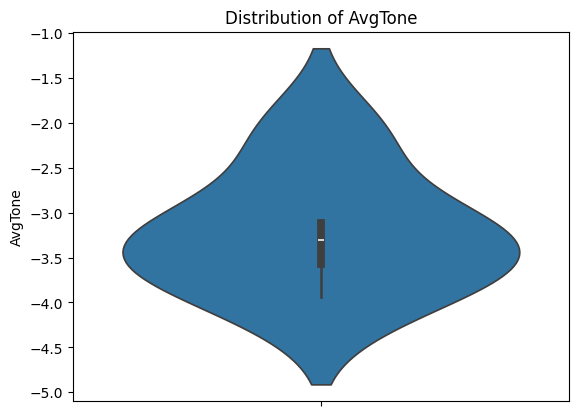

In [ ]:
sns.violinplot(y=df_merged1["AvgTone"])
plt.title("Distribution of AvgTone")
plt.show()

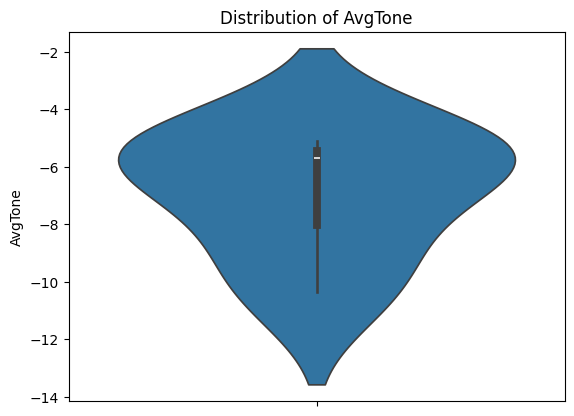

In [ ]:
sns.violinplot(y=df_merged2["AvgTone"])
plt.title("Distribution of AvgTone")
plt.show()

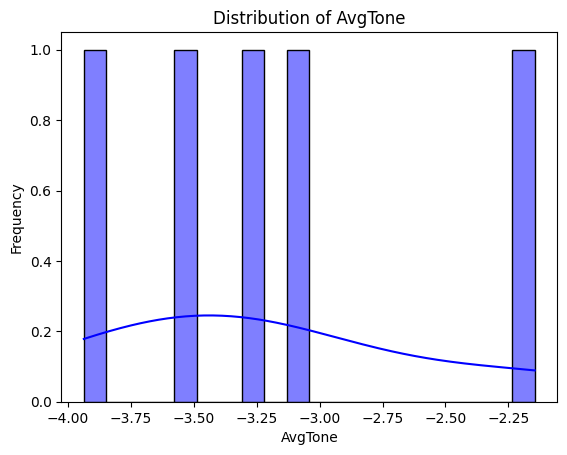

In [ ]:
sns.histplot(df_merged1["AvgTone"], bins=20, kde=True, color="blue")
plt.title("Distribution of AvgTone")
plt.xlabel("AvgTone")
plt.ylabel("Frequency")
plt.show()

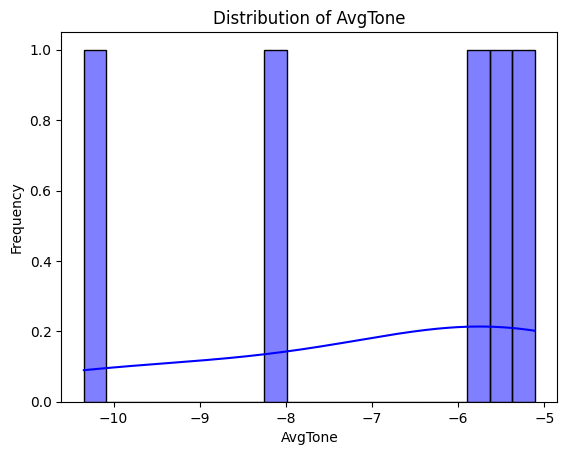

In [ ]:
sns.histplot(df_merged2["AvgTone"], bins=20, kde=True, color="blue")
plt.title("Distribution of AvgTone")
plt.xlabel("AvgTone")
plt.ylabel("Frequency")
plt.show()